In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df, y = fetch_california_housing(return_X_y=True, as_frame=True)
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
# Visualizar correlação entre as variáveis 
df['prices'] = y
df.corr(method='pearson')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,prices
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
prices,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


const     0.450856
MedInc    0.417938
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:35:32   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


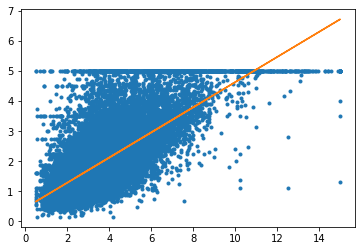

In [ ]:
# RERESSÃO LINEAR para MedInc
X = df['MedInc']
results = sm.OLS(y, sm.add_constant(X)).fit()
print(results.params)
print(results.summary())

# TRAÇAR O GRÁFICO DE DISPERSÃO E A REGRESSÃO LINEAR
plt.plot(X, y, ".")
line = np.ones(len(X)) *results.params[0] + X*results.params[1]
plt.plot(X, line)


In [ ]:
# RERESSÃO LINEAR para AveBedrms
X = df['AveBedrms']
results = sm.OLS(y, sm.add_constant(X)).fit()
print(results.params)
print(results.summary())



const        2.193266
AveBedrms   -0.113714
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     45.11
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.91e-11
Time:                        21:32:13   Log-Likelihood:                -32219.
No. Observations:               20640   AIC:                         6.444e+04
Df Residuals:                   20638   BIC:                         6.446e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


[10.00153     0.10078848]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     8460.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:50:01   Log-Likelihood:                -1418.2
No. Observations:                1000   AIC:                             2840.
Df Residuals:                     998   BIC:                             2850.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0015     

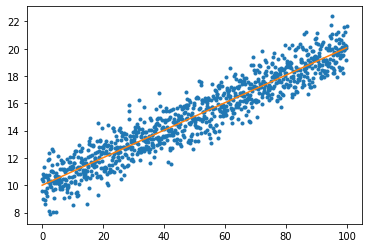

In [ ]:
# RERESSÃO LINEAR para um valor sintético
X = np.arange(0, 100, 0.1)
Y = 10 + 0.1*X + np.random.randn(len(X))
results = sm.OLS(Y, sm.add_constant(X)).fit()
print(results.params)
print(results.summary())

# TRAÇAR O GRÁFICO DE DISPERSÃO E A REGRESSÃO LINEAR
plt.plot(X, Y, ".")
line = np.ones(len(X)) *results.params[0] + X*results.params[1]
plt.plot(X, line)
print(results.rsquared)
print(np.sqrt(results.mse_total))
